## Notebook under construction 

## Backpropagation with Tensorflow

* Builds the computational Graph for the forward pass
* Displays the graph on TensorBoard
* Using the TensorFlow Optimizer to minimize the loss

<a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/backpropagation_tf.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/backpropagation_tf.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import tensorflow as tf
from __future__ import absolute_import, division, print_function
print('TF Version:', tf.__version__)

TF Version: 1.12.0


In [0]:
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32) 

###  Doing the back propagation by hand for the example

In [0]:
y = [1]
x = [2]
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32) 

In [0]:
# x,y are one dimensional numpy arrays
# Defining the graph (construction phase)
tf.reset_default_graph()   #  “Wipe the blackboard”, construct a new graph
a_  = tf.Variable(3.0, name='a_var') #  Variables, with starting values, can be optimize later
b_  = tf.Variable(4.0, name='b_var')  #  we name them so that they look nicer in the graph
x_  = tf.constant(x, name='x_const')  # Constants these are fixed tensors holding the data values 
y_  = tf.constant(y, name='y_const')  


# We know do it step by step so that we can calculate the intermediate values and gradients
ax_ = a_* x_
y_hat_ = ax_ + b_
r_ = y_hat_ - y_
s_ = tf.square(r_)
mse_ = tf.reduce_mean(s_) #The final result, the MSE. Still symbolical

grads_ = tf.gradients(mse_, [a_,b_,ax_,y_hat_,r_,s_])

grads_s_ = tf.gradients(s_,r_ )
grads_s_ = tf.gradients(s_,r_ )

writer = tf.summary.FileWriter("linreg/", tf.get_default_graph())
writer.close()

In [0]:
#TOOD show on tensorboard

In [0]:
sess = tf.Session() #Starts a session and grabs memory and other resources
vals = sess.run([mse_, a_,b_,ax_,y_hat_,r_,s_], {a_:3,b_:4}) # Letting the variables a=3 b=1 flow through the graph
for p in vals:
  print(p)


print("Hallo")
grads = sess.run(grads_, {a_:3,b_:4}) # Letting the variables a=3 b=1 flow through the graph
for p in grads:
  print(p)


sess.close() # Don't forget to close the session

81.0
3.0
4.0
[6.]
[10.]
[9.]
[81.]
Hallo
36.0
18.0
[18.]
[18.]
[18.]
[1.]


In [0]:
# We add an addtional operation to the graph optimizing the mse_
train_op_ = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(mse_) 
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer()) #Doing the initialization on the concrete realization of the graph
    for i in range(1):
      _, mse, grads,grads_rs, a, b = sess.run([train_op_, mse_, grads_,grads_s_, a_, b_])#fetch all the gradients here 
#      # These line are just for printing ou the gradients
#      for g, v in grads_and_vars:
#        tf.summary.histogram(v.name, v)
#        tf.summary.histogram(v.name + '_grad', g)
#      merged = tf.summary.merge_all()
#      writer = tf.summary.FileWriter('train_log_layer', tf.get_default_graph())
#      if (i % 10000 == 0): #Trick not to print so often
#        print(a, b, mse)

In [0]:
print(a,b)

2.99964 3.99982


In [0]:
print(grads)
print(grads_rs)

[36.0, 18.0, array([18.], dtype=float32), array([18.], dtype=float32), array([18.], dtype=float32), array([1.], dtype=float32)]
[array([18.], dtype=float32)]


In [0]:
#grads_ = tf.gradients(mse_, [a_,b_,ax_,y_hat_,r_,rs_])
grads[5]*grads_rs*

array([1.], dtype=float32)

In [0]:
# Let's add an optimizer to the loss 
loss = rss #This is usually called loss and we want to minimize the loss.
train_op = tf.train.AdamOptimizer().minimize(loss) 
init_op = tf.global_variables_initializer()
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(100000):
      _,a_val, b_val, loss_val = sess.run([train_op,a,b, loss])
      if (i % 10000 == 0): #Trick not to print so often
        print(a_val, b_val, loss_val)

In [0]:
loss = rss #This is usually called loss and we want to minimize the loss.
train_op = tf.train.RMSPropOptimizer(learning_rate=0.01).minimize(loss)
init_op = tf.global_variables_initializer()
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(100000):
      _,a_val, b_val, loss_val = sess.run([train_op,a,b, loss])
      if (i % 10000 == 0): #Trick not to print so often
        print(a_val, b_val, loss_val)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
av = np.linspace(-3,3,100)

In [0]:
resv = np.zeros_like(av)
for i,a in enumerate(av):
  resv[i] = np.sum((a*x + b - y)**2)

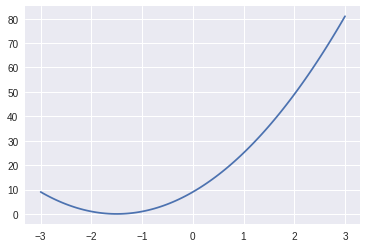

In [0]:
plt.plot(av, resv)